# Naive Bayes Classification

# Preprocessing and data exploration

In [22]:
#imporing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

In [23]:
#reading dataset
Data=pd.read_csv('sample_data/Social_Network_Ads.csv')
print(Data.head(10))
Data.describe()

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
5  15728773    Male   27            58000          0
6  15598044  Female   27            84000          0
7  15694829  Female   32           150000          1
8  15600575    Male   25            33000          0
9  15727311  Female   35            65000          0


,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [24]:
#training and testing set size
train_size=int(0.75*Data.shape[0])
test_size=int(0.25*Data.shape[0])
print("Training set size : "+ str(train_size))
print("Testing set size : "+str(test_size))

Training set size : 300
Testing set size : 100


In [25]:
#Getting features from dataset
Data=Data.sample(frac=1)
X=Data.iloc[:,[2, 3]].values
y=Data.iloc[:,4].values
X=X.astype(float)

In [26]:

class FeatureScaling:
    def __init__(self,X,y):
        self.X=X.copy()
        if y.ndim==1:
            y=np.reshape(y,(y.shape[0],1))
        self.y=y.copy()
        self.minMax_X={}
        self.minMax_y={}
    
    def fit_transform_X(self):
        num_of_features=self.X.shape[1]
        for i in range(num_of_features):
            feature=self.X[:,i]
            Mean=np.mean(feature)
            Min=np.min(feature)
            Max=np.max(feature)
            feature=(feature-Mean)/(Max-Min)
            self.minMax_X[i]=np.array([Mean,Min,Max])
            self.X[:,i]=feature
        return self.X.copy()
    
    def fit_transform_Y(self):
        num_of_features=self.y.shape[1]
        for i in range(num_of_features):
            feature=self.y[:,i]
            Mean=np.mean(feature)
            Min=np.min(feature)
            Max=np.max(feature)
            feature=(feature-Mean)/(Max-Min)
            self.minMax_y[i]=np.array([Mean,Min,Max])
            self.y[:,i]=feature
        return np.reshape(self.y,self.y.shape[0])
    
    def inverse_transform_X(self,X):
        X_transformed=X.copy()
        num_of_features=X_transformed.shape[1]
        for i in range(num_of_features):
            feature=X_transformed[:,i]
            Mean=self.minMax_X[i][0]
            Min=self.minMax_X[i][1]
            Max=self.minMax_X[i][2]
            feature=feature*(Max-Min)+Mean
            X_transformed[:,i]=feature
        return X_transformed
    
    def inverse_transform_Y(self,y):
        y_transformed=y.copy()
        if y_transformed.ndim==1:
            y_transformed=np.reshape(y_transformed,(y_transformed.shape[0],1))
        num_of_features=y_transformed.shape[1]
        for i in range(num_of_features):
            feature=y_transformed[:,i]
            Mean=self.minMax_y[i][0]
            Min=self.minMax_y[i][1]
            Max=self.minMax_y[i][2]
            feature=feature*(Max-Min)+Mean
            y_transformed[:,i]=feature
        return np.reshape(y_transformed,y_transformed.shape[0])
    
    def transform_X(self,X):
        X_transformed=X.copy()
        num_of_features=X_transformed.shape[1]
        for i in range(num_of_features):
            feature=X_transformed[:,i]
            Mean=self.minMax_X[i][0]
            Min=self.minMax_y[i][1]
            Max=self.minMax_y[i][2]
            feature=(feature-Mean)/(Max-Min)
            X_transformed[:,i]=feature
        return X_transformed
    
    def transform_Y(self,y):
        y_transformed=y.copy()
        if y_transformed.ndim==1:
            y_transformed=np.reshape(y_transformed,(y_transformed.shape[0],1))
        num_of_features=y_transformed.shape[1]
        for i in range(num_of_features):
            feature=y_transformed[:,i]
            Mean=self.minMax_y[i][0]
            Min=self.minMax_y[i][1]
            Max=self.minMax_y[i][2]
            feature=(feature-Mean)/(Max-Min)
            y_transformed[:,i]=feature
        return np.reshape(y_transformed,y_transformed.shape[0])
    
    def returnX(self):
        return self.X
    
    def returnY(self):
        return self.y

In [27]:
#feature scaling
fs=FeatureScaling(X,y)
X=fs.fit_transform_X()

In [28]:
#training set split
X_train=X[0:train_size,:]
y_train=y[0:train_size]

In [29]:
#testing set split
X_test=X[train_size:,:]
y_test=y[train_size:]

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


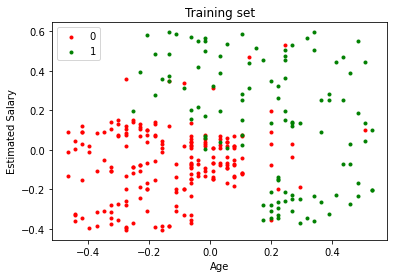

In [30]:
#visualize the training set 
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j,marker='.')
plt.title('Training set')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# ALGO

In [31]:
class Naive_Bayes():
    def __init__(self):
        self.class_data_dic={}
    
    
        
    def fit(self,X_train,y_train):
        def generate_data(class_data_dic,X_train,y_train):
            first_one=True
            first_zero=True
            for i in range(y_train.shape[0]):
                X_temp=X_train[i,:].reshape(X_train[i,:].shape[0],1)
                if y_train[i]==1:
                    if first_one==True:
                        class_data_dic[1]=X_temp
                        first_one=False
                    else:
                        class_data_dic[1]=np.append(class_data_dic[1],X_temp,axis=1)
                elif y_train[i]==0:
                    if first_zero==True:
                        class_data_dic[0]=X_temp
                        first_zero=False
                    else:
                        class_data_dic[0]=np.append(class_data_dic[0],X_temp,axis=1)
            return class_data_dic
    
        self.X_train=X_train
        self.y_train=y_train
        self.class_data_dic[0]=np.array([[]])
        self.class_data_dic[1]=np.array([[]])
        self.class_data_dic=generate_data(self.class_data_dic,self.X_train,self.y_train)
        self.class_data_dic[0]=self.class_data_dic[0].T
        self.class_data_dic[1]=self.class_data_dic[1].T
        self.mean_0=np.mean(self.class_data_dic[0],axis=0)
        self.mean_1=np.mean(self.class_data_dic[1],axis=0)
        self.std_0=np.std(self.class_data_dic[0],axis=0)
        self.std_1=np.std(self.class_data_dic[1],axis=0)
        
        
    def predict(self,X_test):
        def posterior(X,X_train_class,mean_,std_):
            def likelyhood(x,mean,sigma):
                return np.exp(-(x-mean)**2/(2*sigma**2))*(1/(np.sqrt(2*np.pi)*sigma))
            
            product=np.prod(likelyhood(X,mean_,std_),axis=1)
            product=product*(X_train_class.shape[0]/self.X_train.shape[0])
            return product
        
        p_1=posterior(X_test,self.class_data_dic[1],self.mean_1,self.std_1)
        p_0=posterior(X_test,self.class_data_dic[0],self.mean_0,self.std_0)
        return 1*(p_1>p_0)


In [32]:
#creating object for classifier
nb=Naive_Bayes()

In [33]:
#fit the classifier
nb.fit(X_train,y_train)

# Making Predictions

In [34]:
y_pred=nb.predict(X_test)

In [35]:
#getting the confusion matrix
tp=len([i for i in range(0,y_test.shape[0]) if y_test[i]==0 and y_pred[i]==0])
tn=len([i for i in range(0,y_test.shape[0]) if y_test[i]==0 and y_pred[i]==1])
fp=len([i for i in range(0,y_test.shape[0]) if y_test[i]==1 and y_pred[i]==0])
fn=len([i for i in range(0,y_test.shape[0]) if y_test[i]==1 and y_pred[i]==1])
confusion_matrix=np.array([[tp,tn],[fp,fn]])
print(confusion_matrix)
print(f'Accuracy: {confusion_matrix[0][0]+confusion_matrix[1][1]}%')

[[60  5]
 [ 3 32]]
Accuracy: 92%


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


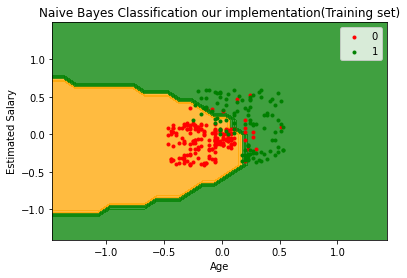

In [36]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.1),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.1))
plt.contourf(X1, X2, nb.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('orange', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j,marker='.')
plt.title('Naive Bayes Classification our implementation(Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


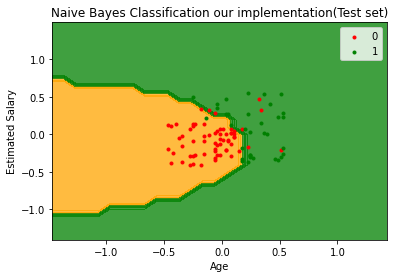

In [37]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.1),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.1))
plt.contourf(X1, X2, nb.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('orange', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j,marker='.')
plt.title('Naive Bayes Classification our implementation(Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()